In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [14]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

data = pd.read_csv(url)

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
print(data.dtypes)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [17]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


There is no missing values and the data frame contains 8 numeric categoricals. 

# Visualize the Data

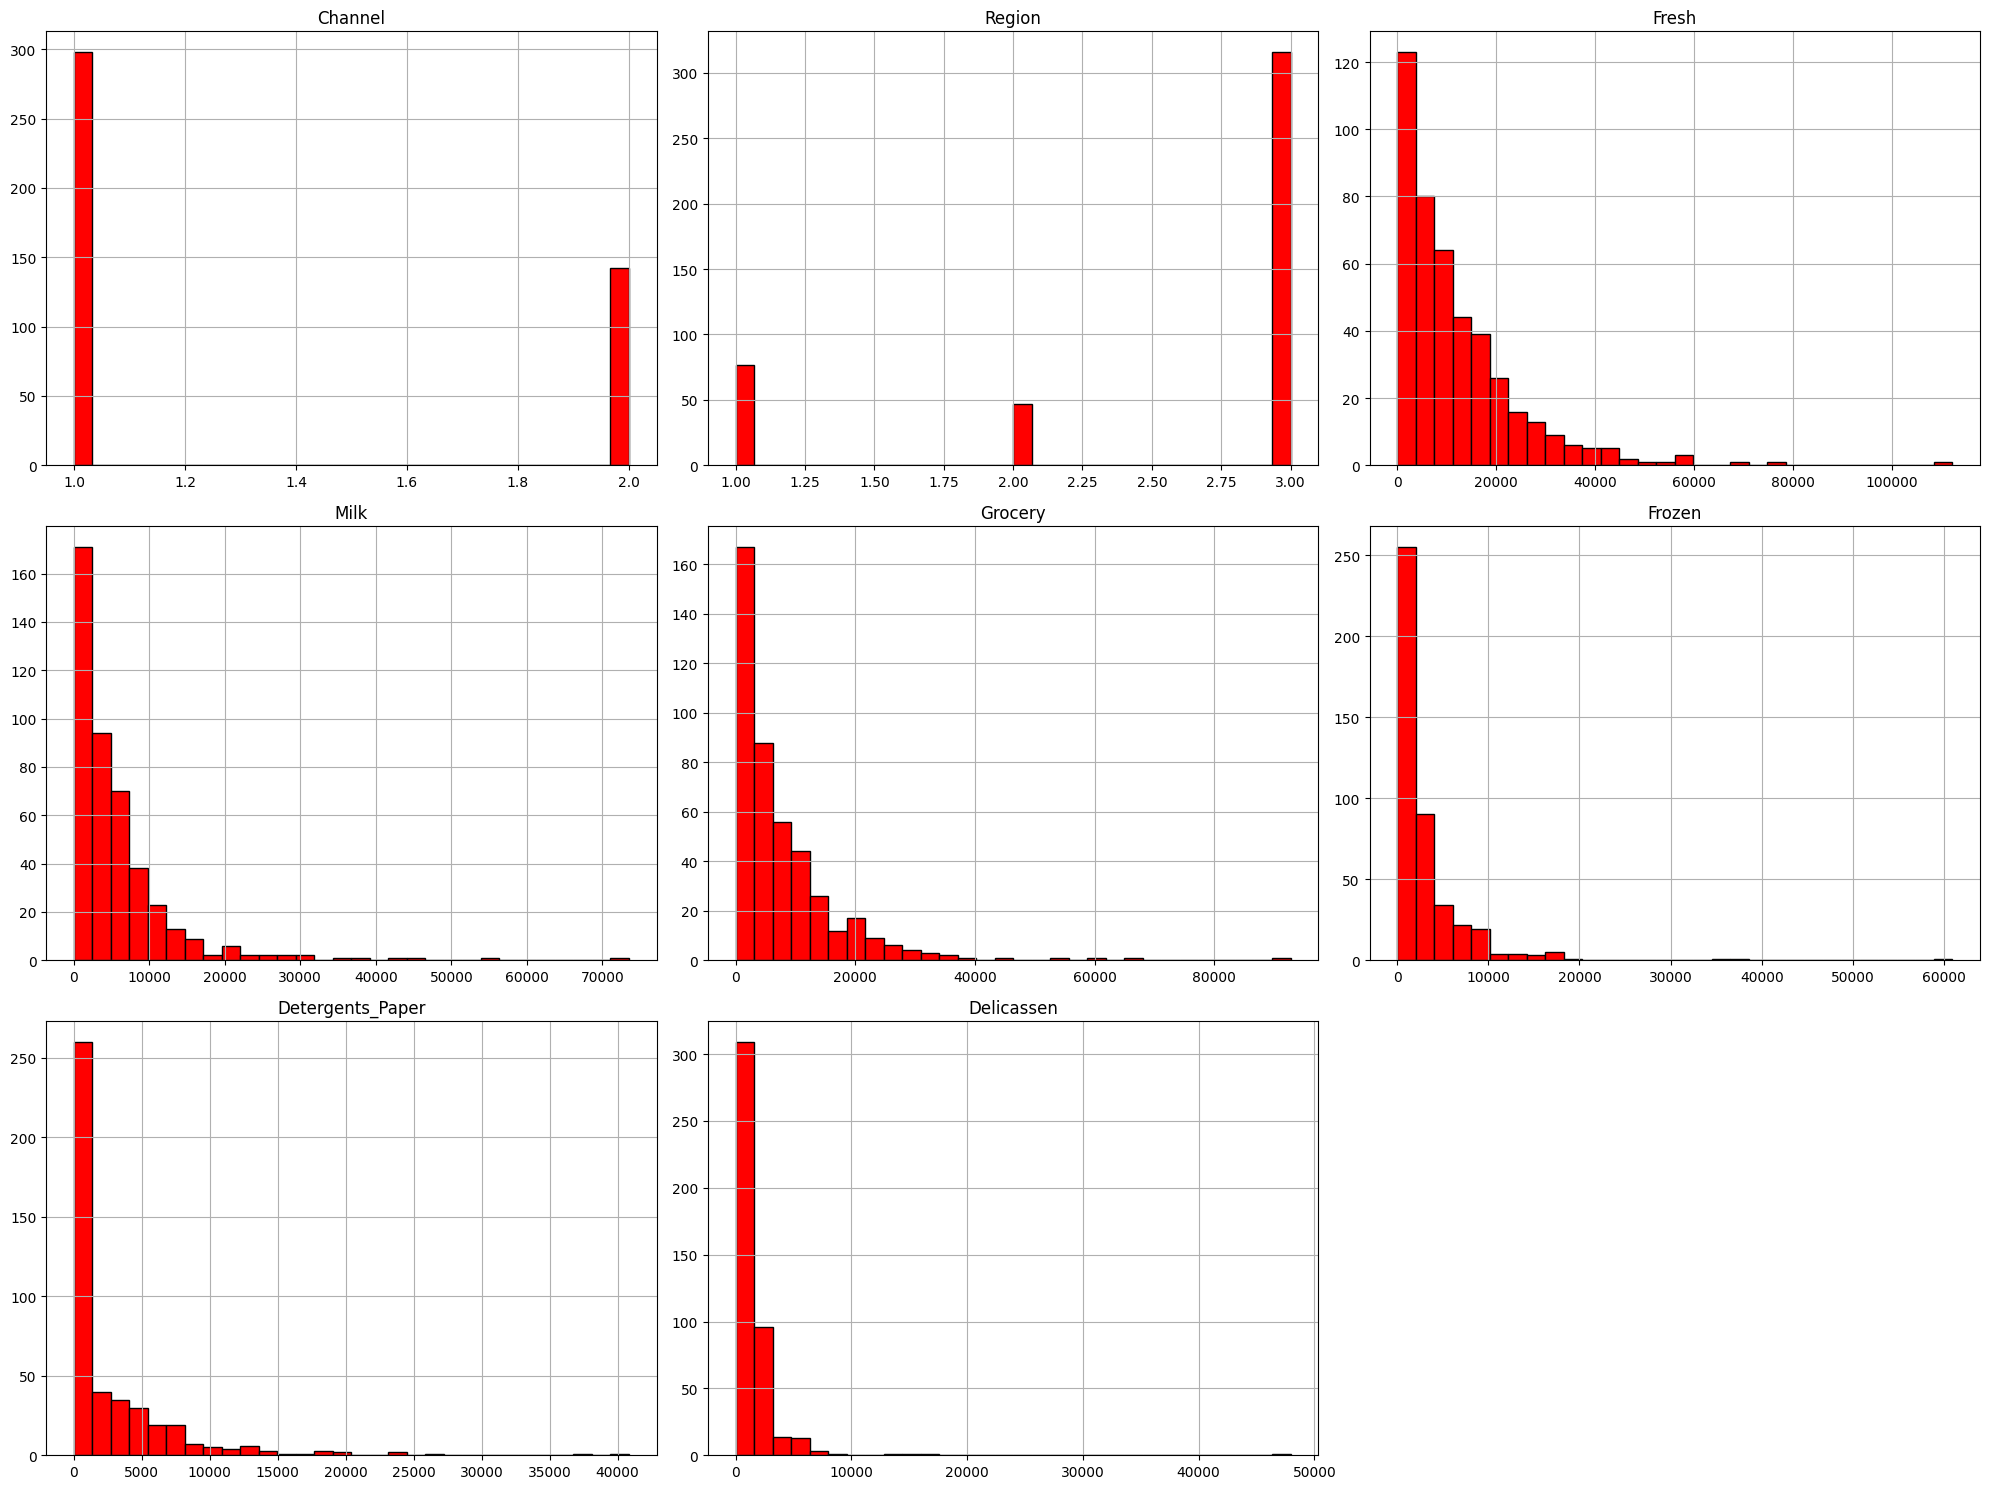

In [24]:
data.hist(bins = 30, figsize = (20, 15), color = 'red', edgecolor = 'black')
plt.tight_layout()
plt.title('Distribution of All Categories')
plt.show()

<Axes: >

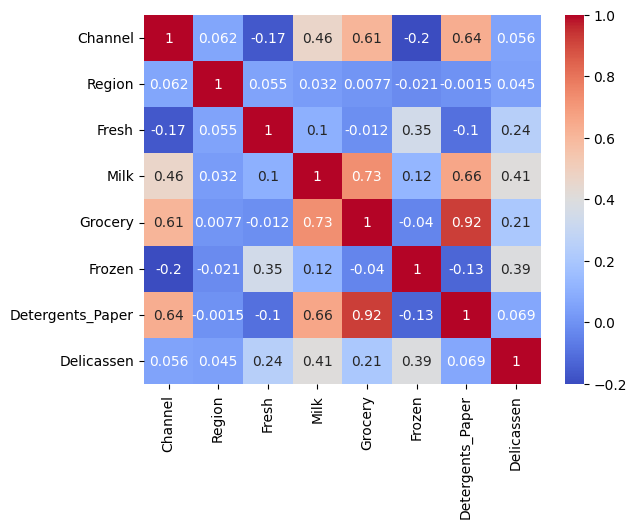

In [25]:
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

There is high correlation among Detergents_Paper, Grocery & Milk which might indicates that these products might represent goods that are often bought together.

For example, in the context of wholesale customers, a grocery store or a supermarket might typically buy these three types of products together in large quantities. This could result in these features showing high correlation in the dataset.

In [30]:
correlation = data[['Detergents_Paper', 'Grocery', 'Milk']].corr()
print(correlation)

                  Detergents_Paper   Grocery      Milk
Detergents_Paper          1.000000  0.924641  0.661816
Grocery                   0.924641  1.000000  0.728335
Milk                      0.661816  0.728335  1.000000


# Data Preprocessing

In [32]:
# Creating a new feature that is the average of these products

data['Average_GMD'] = data[['Detergents_Paper', 'Grocery', 'Milk']].mean(axis = 1)

In [38]:
# Normalize the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

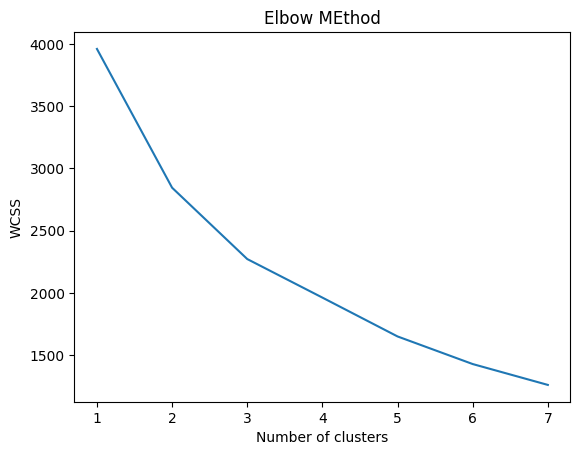

In [46]:
# Choose number of clusters

wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss)
plt.title('Elbow MEthod')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow of the plot appears to be at 2, 3 & 5, these are good choices for the number of clusters to use K-Means algorithm

In [54]:
# Apply K-Means with 2 clusters

kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
clusters2 = kmeans2.fit_predict(data_scaled)

# Apply K-Means with 3 clusters

kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
clusters3 = kmeans3.fit_predict(data_scaled)

In [59]:
data['Cluster2'] = clusters2

data['Cluster2'].value_counts()
centroids2 = data.groupby('Cluster2').mean()
print(centroids2)

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.955224  2.611940   9133.820896  11979.619403  17496.097015   
1        1.045752  2.513072  13255.552288   3088.522876   3771.519608   

              Frozen  Detergents_Paper   Delicassen   Average_GMD  
Cluster                                                            
0        1971.985075       7629.723881  2349.776119  12368.480100  
1        3553.607843        802.202614  1163.637255   2554.081699  


In [60]:
cluster_sizes2 = data['Cluster'].value_counts()
print(cluster_sizes)

Cluster
1    306
0    134
Name: count, dtype: int64


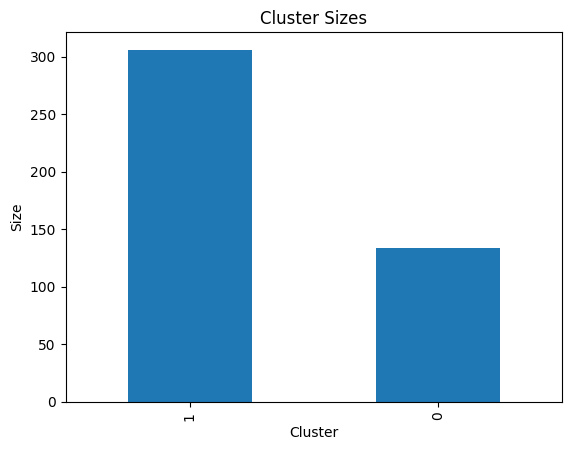

In [61]:
cluster_sizes2.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Cluster Sizes')
plt.show()

Based on the clustering results, some inferences about the buying habits of the customers can be made. 

Cluster 0: This cluster has higher average values for 'Milk', 'Grocery', 'Detergents_Paper', and 'Average_GMD'. This suggests that customers in this cluster tend to purchase more of these products. This could represent customers like supermarkets or large grocery stores.

Cluster 1: This cluster has higher average values for 'Fresh' and 'Frozen'. This suggests that customers in this cluster tend to purchase more fresh and frozen products. This could represent customers like restaurants or cafes that need fresh and frozen food to prepare meals.

The size of the clusters also provides some insights:

Cluster 1 is larger than Cluster 0, suggesting that there are more customers that fit the profile of Cluster 1 (i.e., buying more fresh and frozen products) than Cluster 0.

In [64]:
data['Cluster3'] = clusters3

data['Cluster3'].value_counts()
centroids3 = data.groupby('Cluster3').mean()
print(centroids3)

           Channel    Region         Fresh          Milk       Grocery  \
Cluster3                                                                 
0         1.010169  2.515254  13275.508475   3038.474576   3727.000000   
1         1.846154  2.615385  25770.769231  35160.384615  41977.384615   
2         1.969697  2.598485   7794.212121   9067.590909  14040.840909   

               Frozen  Detergents_Paper   Delicassen   Average_GMD   Cluster  
Cluster3                                                                      
0         3601.477966        738.837288  1221.627119   2501.437288  0.996610  
1         6844.538462      19867.384615  7880.307692  32335.051282  0.000000  
2         1516.931818       5997.151515  1576.659091   9701.861111  0.090909  


In [66]:
cluster_sizes3 = data['Cluster3'].value_counts()
print(cluster_sizes)

Cluster3
0    295
2    132
1     13
Name: count, dtype: int64


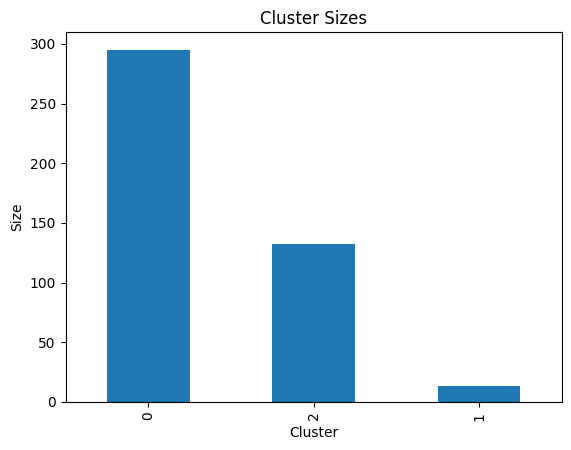

In [67]:
cluster_sizes3.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Cluster Sizes')
plt.show()

Cluster 0: This cluster has the highest average for 'Fresh' and the lowest averages for 'Milk', 'Grocery', 'Detergents_Paper', 'Delicassen', and 'Average_GMD'. This suggests that customers in this cluster tend to purchase more fresh products and fewer of the other types of products. This could represent customers like restaurants or cafes that need fresh food to prepare meals.

Cluster 1: This cluster has the highest averages for 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', and 'Average_GMD'. This suggests that customers in this cluster tend to purchase more of these products. This could represent customers like supermarkets or large grocery stores.

Cluster 2: This cluster has lower averages for all features compared to Cluster 1, but higher averages for 'Milk', 'Grocery', 'Detergents_Paper', and 'Average_GMD' compared to Cluster 0. This suggests that customers in this cluster have a more balanced purchasing behavior, buying a moderate amount of various types of products. This could represent smaller retailers or markets.